In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

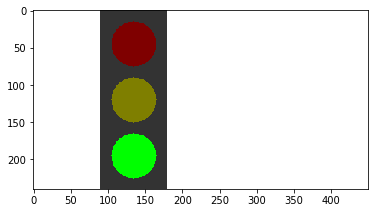

In [165]:
img = cv2.imread('simple_tl.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# fig, ax = plt.subplots()
# ax.imshow(img)
# ax.axis('off')
# plt.show()

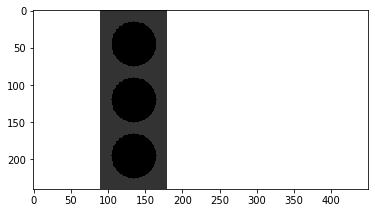

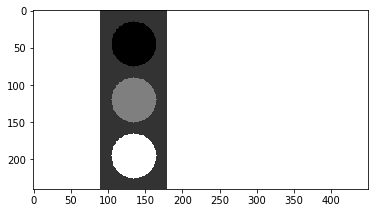

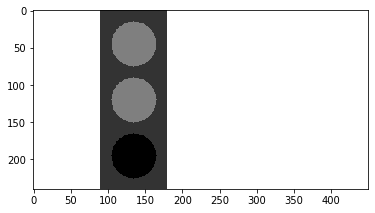

In [167]:
b_img, g_img, r_img = cv2.split(img)

plt.imshow(b_img, 'gray')
# plt.imshow(b_img)
plt.show()

plt.imshow(g_img, 'gray')
# plt.imshow(g_img)
plt.show()

plt.imshow(r_img, 'gray')
# plt.imshow(r_img)
plt.show()

In [44]:
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(img_gray)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
# cv2.waitKey(0)
# for r in range(0, 50):
g_img_blur = cv2.medianBlur(g_img,5)
circles = cv2.HoughCircles(g_img_blur, cv2.HOUGH_GRADIENT, 1, 1, param1=50, param2=1, minRadius=0,maxRadius=30)
print(circles)
print(circles.shape)

[[[133.5  44.5  29.4]
  [133.5 119.5  29.4]
  [133.5 194.5  29.4]
  ...
  [179.5 204.5   0.3]
  [179.5 209.5   0.3]
  [179.5 234.5   0.3]]]
(1, 1896, 3)


In [58]:
g_img_blur = cv2.medianBlur(g_img,5)
circles = cv2.HoughCircles(g_img_blur, cv2.HOUGH_GRADIENT, 1, 30, param1=50, param2=8, minRadius=0,maxRadius=30)
print(circles)
print(circles.shape)

[[[133.5  44.5  29.4]
  [133.5 119.5  29.4]
  [133.5 194.5  29.4]]]
(1, 3, 3)


In [85]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray.shape
radius = 30
circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 2*radius, param1=50, param2=8,
#                            minRadius=0,
                           maxRadius=35)
print(circles)
print(circles.shape)

[[[135.5  45.5  30.8]
  [135.5 120.5  30.8]
  [135.5 195.5  30.8]]]
(1, 3, 3)


# HSV Detections

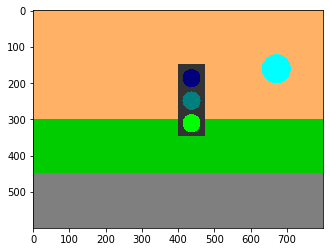

(600, 800, 3)


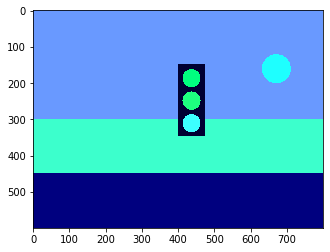

In [48]:
# img = cv2.imread('simple_tl.png')
img = cv2.imread('scene_tl_1.png')
plt.imshow(img)
plt.show()
print(img.shape)
# print(img[434][188])
# print(img[434, 188])
# print(img[434][250])
# print(img[434, 250])
# print(img[434][312])
# print(img[434, 312])
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)
plt.show()

# img = cv2.imread('scene_tl_1.png')
# img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# plt.imshow(img_hsv)
# plt.show()

# img = cv2.imread('scene_tl_2.png')
# img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# plt.imshow(img_hsv)
# plt.show()

In [49]:
# img = cv2.imread('simple_tl.png')
img = cv2.imread('scene_tl_1.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
radius = 22
circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 2*radius, param1=50, param2=8,
                           minRadius=radius, maxRadius=radius)
print(circles)
print(circles.shape)

[[[434.5 187.5  23.4]
  [434.5 249.5  23.4]
  [434.5 311.5  23.4]]]
(1, 3, 3)


In [ ]:
circles = np.uint16(np.around(circles))
# print("cirlces", circles)
# print(circles[0][0])
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)
    print("i: ", i)
#     print("shape", img.shape)
    print(img[i[1], i[0]])
    print(img_hsv[i[1], i[0]])
    print()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# for coordinate in circles[0].tolist():
#     row, col, _ = coordinate
#     print(row, col, _)
#     print(img_hsv[row, col])

In [139]:
def find_triangle(lines, orientation):
    """

    :param lines: list of lines from HoughLines()???
    :param orientation: this can be ignored for our case, (challenge?)
    :return:
    """
    '''
    valid_angles = [30, 90, 330]
    valid_angles += orientation
    
    sides = []
    for line in lines:
        if line.theta is in valid_angles:
            sides.append(lines)
            
    vertices = []
    for j in 0 to 2:
        vertices.append(intersection(sides[j-1], sides[j]))
    '''
    pass

# Load Image and Filter for Color

(600, 800, 3)


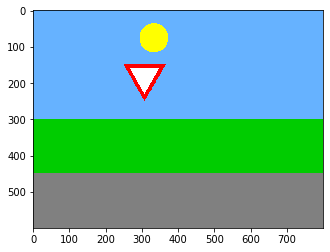

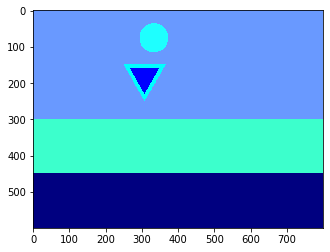

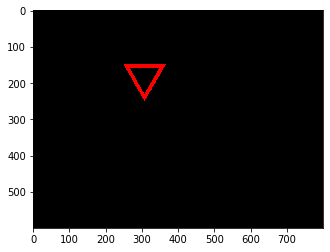

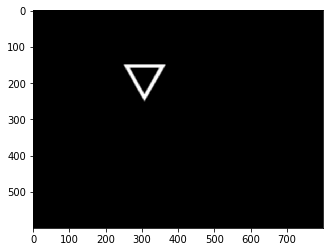

In [226]:
img = cv2.imread('scene_yld_1.png')
# img = cv2.imread('scene_tl_1.png')
# img = cv2.imread('heisenberg-drawing-desktop-1.png')
print(img.shape)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img_blur = cv2.GaussianBlur(img_gray, (5,5), 15)
plt.imshow(cv2.cvtColor(gray_img_blur, cv2.COLOR_BGR2RGB))

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_red = np.array([0, 245, 245])
upper_red = np.array([1, 255, 255])

mask = cv2.inRange(hsv, lower_red, upper_red)
res = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(hsv)
plt.show()
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()

res_blur = cv2.GaussianBlur(res[:,:,2], (5,5), 40)
image_for_canny = res_blur
plt.imshow(cv2.cvtColor(image_for_canny, cv2.COLOR_BGR2RGB))
plt.show()

## Canny

(600, 800)


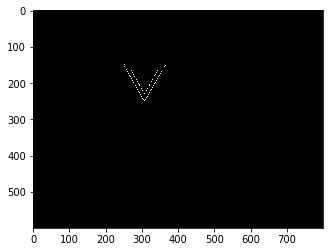

In [227]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
 
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    
    return edged
print(image_for_canny.shape)
edges = cv2.Canny(image_for_canny, 10, 10)
# edges = auto_canny(image_for_canny, 0.99)
plt.imshow(edges, 'gray')
# output_img = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
# plt.show()



3
[[[ 148.           1.5707963]]

 [[-141.           2.6179938]]

 [[ 391.           0.5235988]]]
3


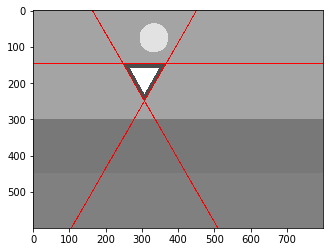

In [228]:
lines = cv2.HoughLines(edges, 1, 5*np.pi/180, 80)
print(len(lines))
print(lines)

output_img = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
print(len(lines))

for i in lines:
    rho, theta = i[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(output_img,(x1,y1),(x2,y2),(0,0,255),2)
    
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))

In [229]:
lines = cv2.HoughLinesP(
    edges, 0.25, np.pi/180,
    15,
    30,
    1
)
print(len(lines))
# print(lines)

output_img = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)

for i in lines:
    x1,y1,x2,y2 = i[0]
    cv2.line(output_img, (x1,y1), (x2,y2), (0,0,255), 2)
    
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))

[[366, 148], [248, 148], [307, 250]]


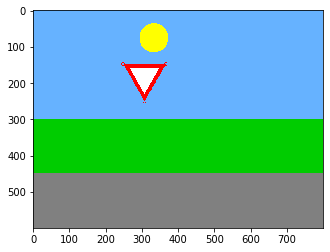

In [232]:
# Source: https://stackoverflow.com/a/46572063
def intersection(line1, line2):
    """Finds the intersection of two lines given in Hesse normal form.

    Returns closest integer pixel locations.
    See https://stackoverflow.com/a/383527/5087436
    """
    rho1, theta1 = line1[0]
    rho2, theta2 = line2[0]
    A = np.array([
        [np.cos(theta1), np.sin(theta1)],
        [np.cos(theta2), np.sin(theta2)]
    ])
    b = np.array([[rho1], [rho2]])
    x0, y0 = np.linalg.solve(A, b)
    x0, y0 = int(np.round(x0)), int(np.round(y0))
    return [[x0, y0]]

vertices = []
for i in range(len(lines)):
    vertices.append(intersection(lines[i-1], lines[i])[0])
               
print(vertices)

output_img = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
output_img = img

for point in vertices:
    cv2.circle(output_img, (point[0], point[1]), 5, (0, 0, 255))
    
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))

In [33]:
color = np.array(
    [[[1, 2, 249]]]
)
color.shape
color.astype(np.uint8)

print(cv2.cvtColor(color, cv2.COLOR_BGR2HSV))

error: OpenCV(4.1.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<3, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 5, -1>, cv::impl::(anonymous namespace)::SizePolicy::NONE>::CvtHelper(InputArray, OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<3, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 5, -1>, sizePolicy = cv::impl::(anonymous namespace)::SizePolicy::NONE]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)
